## 1st Class
> Date: April 02 (2020)

- Library that will be used: sklearn
- **Problem:** Consider that you are working to a video streaming platform and need to make a classifier to define what movie someone want watch based on what this person whatched before.


In [4]:
!pip install seaborn

In [5]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
movies = pd.read_csv(uri)

# If you want program using pt-BR:
# movie.columns = ['filmes_id', 'Nome', 'Genero']
# To use it, you'll need to change all the variable names 
# in all the code

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
genres = movies.genres.str.get_dummies() # Transform the genres in columns with a binary classification 
movies = pd.concat([movies, genres], axis = 1)
# movies = movies.drop(['genres'], axis = 1) # To remove the column 'genres'
movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Scalling the values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_genres = scaler.fit_transform(genres)
scaled_genres.shape

(9742, 20)

In [8]:
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

## 2nd Class
> Date: April 12 (2020)

### Knowing the KMeans
- **Problem:** Now we have a list of movies where each one belong to some genres. What is showing this information to our classifier is a lot of binary columns indicating if the movie belong or not to the indicated genre in the head.

In [9]:
from sklearn.cluster import KMeans
import numpy as np

SEED = 20
np.random.seed(SEED)

# n_clusters = number of groups to be considered in the classification
model = KMeans(n_clusters = 3) 
model.fit(scaled_genres)
print(f'Groups: {(model.labels_)}') # or
# print('Groups: {}'.format(model.labels_)) # is the same command

Groups: [0 0 1 ... 2 0 1]


### How the KMeans works

1. Create centroids according to the number of clusters defined before;

2. Separate the samples in n (n = number of clusters) areas, being that this areas are separated by a line that is between 2 consecutive centroids, exactly in the center, the half distance between them;

3. recentralize the centroids to be in the center of the samples, the place are the distance is as shorter as possible;

4. Do the steps 2 and 3 until the centroids no more need to move. 

## 3th Class
> Date: April 13 (2020)

### Visualizing the centroids
- **Problem:** Now that we know the methods and steps used by the K-Means, we can try to see how it is being used into your problem.

In [10]:
# Order of the showed genres:
print(genres.columns)
# To see the clusters center:
print(model.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.35437981  1.43893274  1.9932825   1.81273598 -0.03605145
  -0.30766533 -0.19822778 -0.64484295  1.48592731 -0.09492563 -0.23755561
   0.71869371  0.3171892  -0.11823003 -0.26971576  0.33712526 -0.38513147
  -0.17110753 -0.09354496]
 [-0.05917995 -0.25213698 -0.22697558 -0.21192202 -0.13668594  1.22932656
  -0.12763086 -0.16146284 -0.3260886  -0.14962459 -0.09175454 -0.18217019
  -0.12131169  0.06407033 -0.18912425  0.27715839 -0.20847461 -0.41512192
  -0.11441059 -0.04472797]
 [ 0.04778314  0.09105442 -0.12580902 -0.23801854 -0.25131071 -0.75782025
   0.13645343  0.13718947  0.32242893 -0.18263185  0.07467289  0.15736365
  -0.05789553 -0.09869257  0.13955    -0.12232267  0.06710235  0.32961413
 

In [11]:
# To make the data more easy to see:

groups = pd.DataFrame(data = model.cluster_centers_,
                     columns = genres.columns)
groups

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.354380,1.438933,1.993283,1.812736,-0.036051,-0.307665,-0.198228,-0.644843,1.485927,-0.094926,-0.237556,0.718694,0.317189,-0.118230,-0.269716,0.337125,-0.385131,-0.171108,-0.093545
1,-0.059180,-0.252137,-0.226976,-0.211922,-0.136686,1.229327,-0.127631,-0.161463,-0.326089,-0.149625,-0.091755,-0.182170,-0.121312,0.064070,-0.189124,0.277158,-0.208475,-0.415122,-0.114411,-0.044728
2,0.047783,0.091054,-0.125809,-0.238019,-0.251311,-0.757820,0.136453,0.137189,0.322429,-0.182632,0.074673,0.157364,-0.057896,-0.098693,0.139550,-0.122323,0.067102,0.329614,0.102896,0.045171


In [12]:
groups.transpose().plot.bar(subplots = True,
                            sharex   = False,
                            figsize  = [25,25], 
                            title    = 'Groups affinity according to genres',
                            fontsize = 15,
                            legend   = True, 
                            grid     = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f66cf112710>,
      dtype=object)

In [13]:
group = 0
data_filter = model.labels_ == group
movies[data_filter].sample(10)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9173,148978,Blue Exorcist: The Movie (2012),Animation|Fantasy|Horror|Mystery,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7927,95510,"Amazing Spider-Man, The (2012)",Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7032,68835,Were the World Mine (2008),Adventure|Fantasy|Musical|Romance,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5543,26631,Alice (Neco z Alenky) (1988),Animation|Fantasy|Mystery,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2077,2761,"Iron Giant, The (1999)",Adventure|Animation|Children|Drama|Sci-Fi,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8091,100163,Hansel & Gretel: Witch Hunters (2013),Action|Fantasy|Horror|IMAX,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
9538,172585,Karlson Returns (1970),Adventure|Animation|Children,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4915,7369,Scooby-Doo 2: Monsters Unleashed (2004),Action|Adventure|Children|Comedy|Mystery,0,1,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
863,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7761,91386,Happy Feet Two (2011),Animation|Children|Comedy|IMAX,0,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
# t-SNE [1] is a tool to visualize high-dimensional data. 
from sklearn.manifold import TSNE

tsne = TSNE()

visualization = tsne.fit_transform(scaled_genres)
visualization

array([[ 56.45921   , -11.583899  ],
       [  0.39949805,  21.97674   ],
       [-43.060337  ,   8.483748  ],
       ...,
       [ 25.058914  ,   8.489712  ],
       [ 41.24614   , -32.84786   ],
       [-13.483238  ,   1.4930756 ]], dtype=float32)

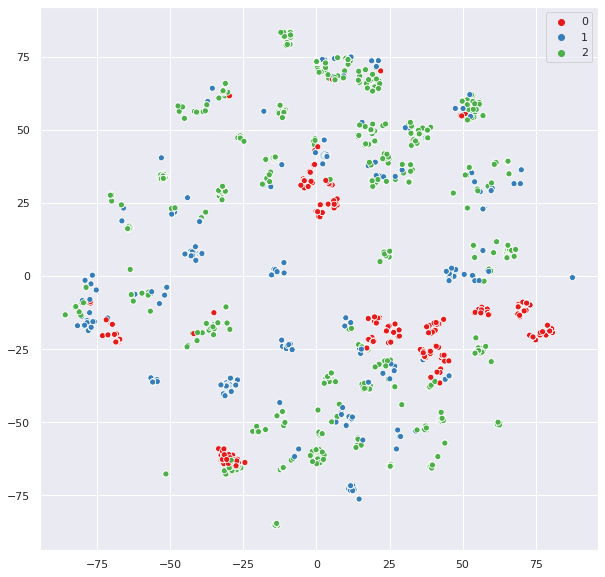

In [24]:
import seaborn as sns

sns.set(rc = {'figure.figsize' : (10,10)})

sns.scatterplot(x = visualization[:, 0],
                y = visualization[:, 1], 
                hue = model.labels_,
                palette = sns.color_palette('Set1', 3))